In [45]:
# Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [46]:
data_src = "heart_2020_cleaned.csv"
df = pd.read_csv(data_src)

In [47]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# Data Preprocessing
1. Checking for null values


2. Checking for outliers


3. Checking for imbalanced data (Data standardisation)


4. Feature engineering and selection


5. Dataframe splitting and fitting

## 2.1 Data Cleaning
### 2.1.1 Null values

In [48]:
print(df.isnull().sum().sort_values(ascending=False))

HeartDisease        0
BMI                 0
KidneyDisease       0
Asthma              0
SleepTime           0
GenHealth           0
PhysicalActivity    0
Diabetic            0
Race                0
AgeCategory         0
Sex                 0
DiffWalking         0
MentalHealth        0
PhysicalHealth      0
Stroke              0
AlcoholDrinking     0
Smoking             0
SkinCancer          0
dtype: int64


There is no null values

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 2.1.2 Encoding Binary Categorica

In [50]:
df['Smoking'] = pd.Series(np.where(df['Smoking'] == 'Yes', 1, 0))
df['AlcoholDrinking'] = pd.Series(np.where(df['AlcoholDrinking'] == 'Yes', 1, 0))
df['Stroke'] = pd.Series(np.where(df['Stroke'] == 'Yes', 1, 0))
df['DiffWalking'] = pd.Series(np.where(df['DiffWalking'] == 'Yes', 1, 0))
df['PhysicalActivity'] = pd.Series(np.where(df['PhysicalActivity'] == 'Yes', 1, 0))
df['Asthma'] = pd.Series(np.where(df['Asthma'] == 'Yes', 1, 0))
df['KidneyDisease'] = pd.Series(np.where(df['KidneyDisease'] == 'Yes', 1, 0))
df['SkinCancer'] = pd.Series(np.where(df['SkinCancer'] == 'Yes', 1, 0))
df['HeartDisease'] = pd.Series(np.where(df['HeartDisease'] == 'Yes', 1, 0))

### 2.1.3 Encoding Categorical with more than 2 values

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['AgeCategory']=le.fit_transform(df['AgeCategory'])
df['Race']=le.fit_transform(df['Race'])
df['Diabetic']=le.fit_transform(df['Diabetic'])
df['GenHealth']=le.fit_transform(df['GenHealth'])

In [52]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int32  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  int32  
 10  Race              319795 non-null  int32  
 11  Diabetic          319795 non-null  int32  
 12  PhysicalActivity  319795 non-null  int32  
 13  GenHealth         319795 non-null  int32  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int32  
 16  KidneyDisease     31

## 2.2 Data Visualisation
### 2.2.1 Data Correlation & Distribution

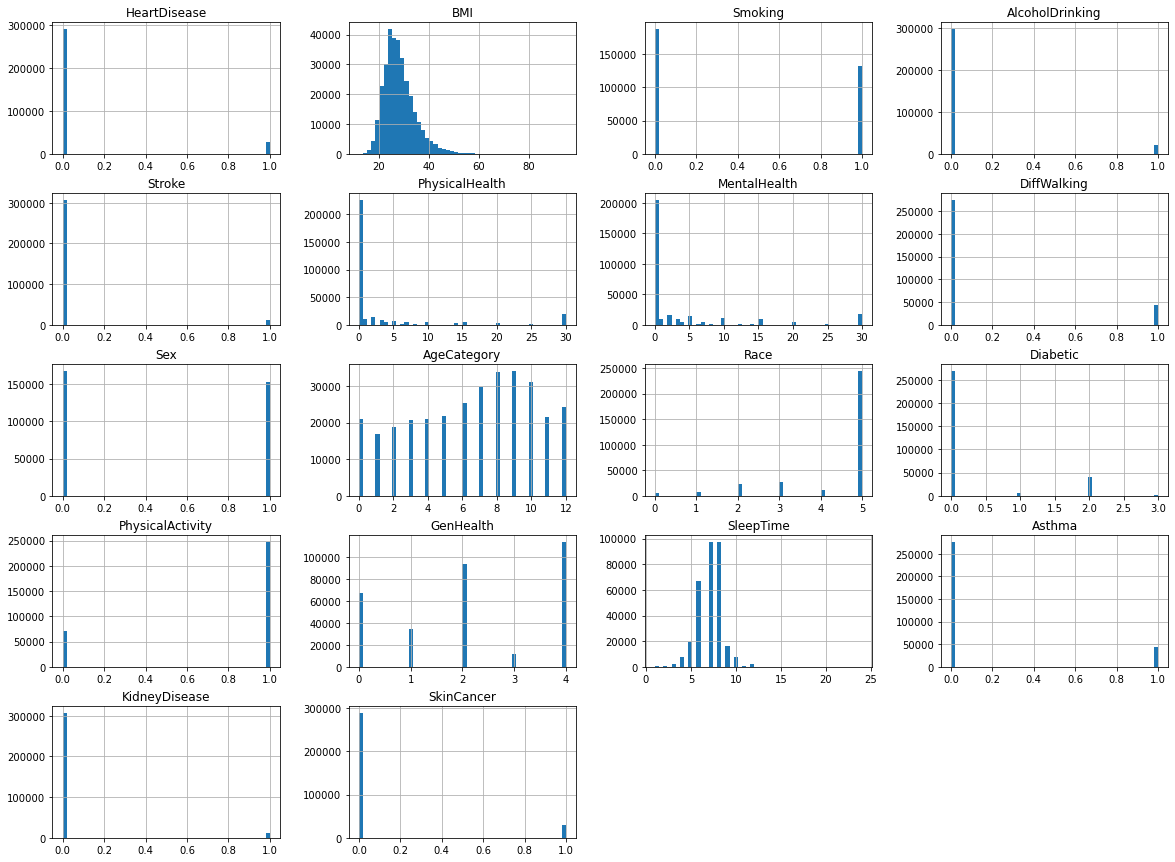

In [54]:
# Histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

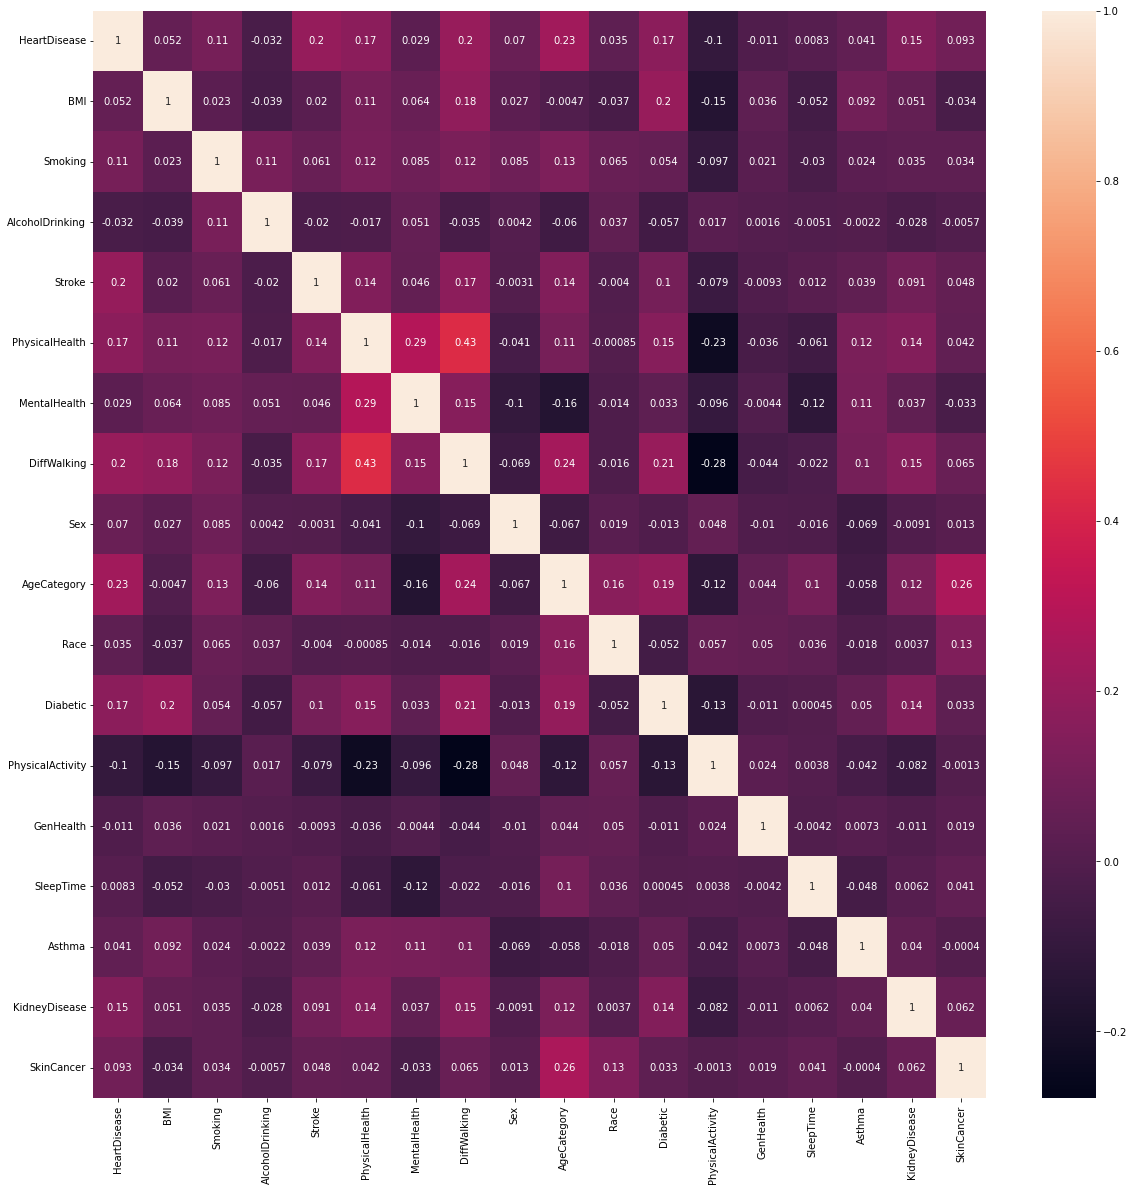

In [55]:
# Heatmap
corr_matrix = df.corr()
plt.figure(figsize = (20,20))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

### 2.2.2 Removing unnecessary features

In [56]:
df.drop(['AlcoholDrinking','PhysicalActivity','GenHealth', 'SleepTime'],axis=1,inplace=True)

## 2.3 Outliers

HeartDisease         AxesSubplot(0.125,0.772143;0.168478x0.107857)
BMI               AxesSubplot(0.327174,0.772143;0.168478x0.107857)
Smoking           AxesSubplot(0.529348,0.772143;0.168478x0.107857)
Stroke            AxesSubplot(0.731522,0.772143;0.168478x0.107857)
PhysicalHealth       AxesSubplot(0.125,0.642714;0.168478x0.107857)
MentalHealth      AxesSubplot(0.327174,0.642714;0.168478x0.107857)
DiffWalking       AxesSubplot(0.529348,0.642714;0.168478x0.107857)
Sex               AxesSubplot(0.731522,0.642714;0.168478x0.107857)
AgeCategory          AxesSubplot(0.125,0.513286;0.168478x0.107857)
Race              AxesSubplot(0.327174,0.513286;0.168478x0.107857)
Diabetic          AxesSubplot(0.529348,0.513286;0.168478x0.107857)
Asthma            AxesSubplot(0.731522,0.513286;0.168478x0.107857)
KidneyDisease        AxesSubplot(0.125,0.383857;0.168478x0.107857)
SkinCancer        AxesSubplot(0.327174,0.383857;0.168478x0.107857)
dtype: object

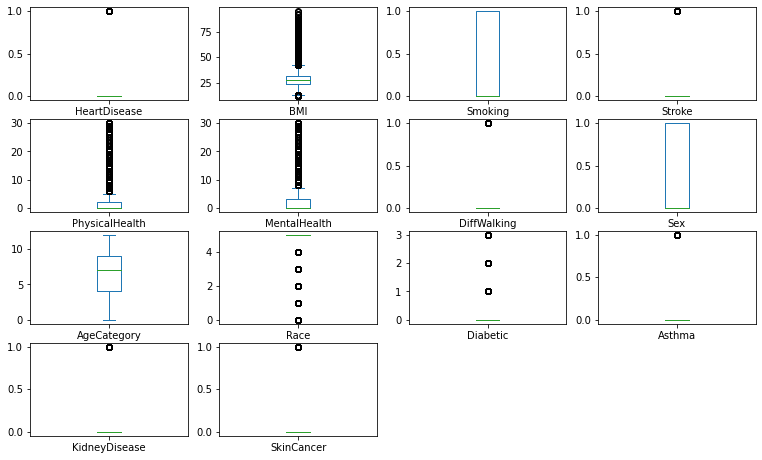

In [57]:
df.plot(kind="box", subplots=True, layout=(6,4), figsize=(13,12))

### 2.3.1 Removing BMI Outliers

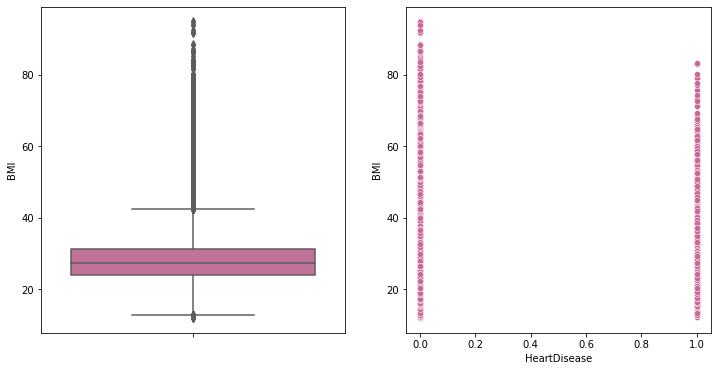

In [58]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x='HeartDisease',y='BMI',color='#cc6699')
plt.show()

In [59]:
x=df[df['BMI']>100]
x.shape

(0, 14)

In [60]:
df=df[df['BMI']<=100]

## 2.4 Data Splitting

In [61]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (319795, 13) 
 y_shape: (319795,)


### 2.4.1 Check imbalanced classes

In [62]:
y.value_counts() 

0    292422
1     27373
Name: HeartDisease, dtype: int64

### 2.4.2 Random Over-Sampling to deal with Imbalanced Data

In [63]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [64]:
from imblearn.over_sampling  import RandomOverSampler
smote = RandomOverSampler(sampling_strategy=1)
X_smote, y_smote = smote.fit_resample(X,y)

In [65]:
print(f' X_shape: {X_smote.shape} \n y_shape: {y_smote.shape}')

 X_shape: (584844, 13) 
 y_shape: (584844,)
